In [139]:
import numpy as np
import os
import matplotlib.pyplot as plt
import importlib as imp
import json
import cellTV_functions as cellTV
import parse_session_functions
import scipy.stats as stats

imp.reload(cellTV)
imp.reload(parse_session_functions)

<module 'parse_session_functions' from '/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Neural_Analysis/parse_session_functions.py'>

In [2]:
base_filepath = '/Volumes/mrsic_flogel/public/projects/AtApSuKuSaRe_20250129_HFScohort2/TAA0000066/ROICaT/alignment/t0_t17/'
file_name = 'roicat_aligned_ROIs_t0_t17.npy'

file_path = os.path.join(base_filepath, file_name)
if os.path.exists(file_path):
    data = np.load(file_path)
    print("File read successfully.")

File read successfully.


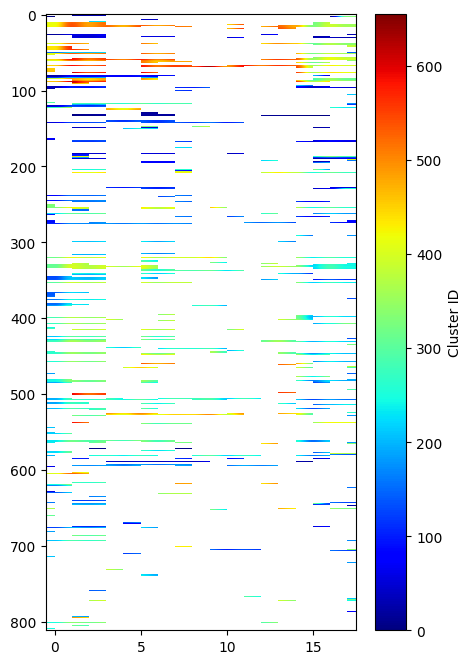

In [3]:
#plot clusterIDs
plt.figure(figsize=(5, 8))
plt.imshow(data.T, cmap='jet', aspect='auto')
plt.colorbar(label='Cluster ID')

In [184]:
# find cool cell across sessions, it is nr 339 in session 12, state cell in 12: 501, ,halfway gp: 215
#different cell to check out 222 in session 8
cool_cell_id = 339
session_data = data[12, :]
idx = np.where(session_data == cool_cell_id)[0]
cell_ids = data[:, idx]
print(f'All session cell IDs for cool cell {cool_cell_id}: {cell_ids}')

All session cell IDs for cool cell 339: [[ nan]
 [393.]
 [369.]
 [389.]
 [345.]
 [402.]
 [ nan]
 [386.]
 [377.]
 [412.]
 [311.]
 [384.]
 [339.]
 [379.]
 [333.]
 [215.]
 [ nan]
 [238.]]


Processing session 8 for cool cell 377
Session ID: -t8


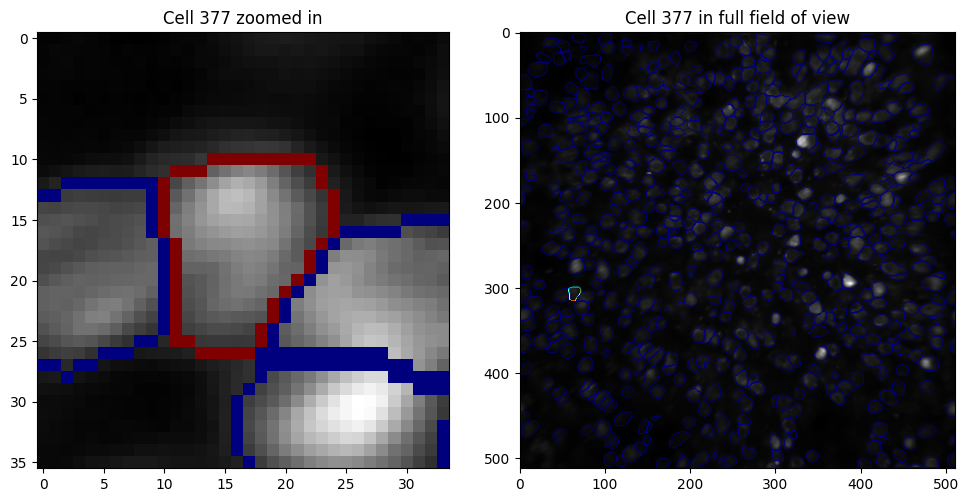

Processing session 9 for cool cell 412
Session ID: -t9


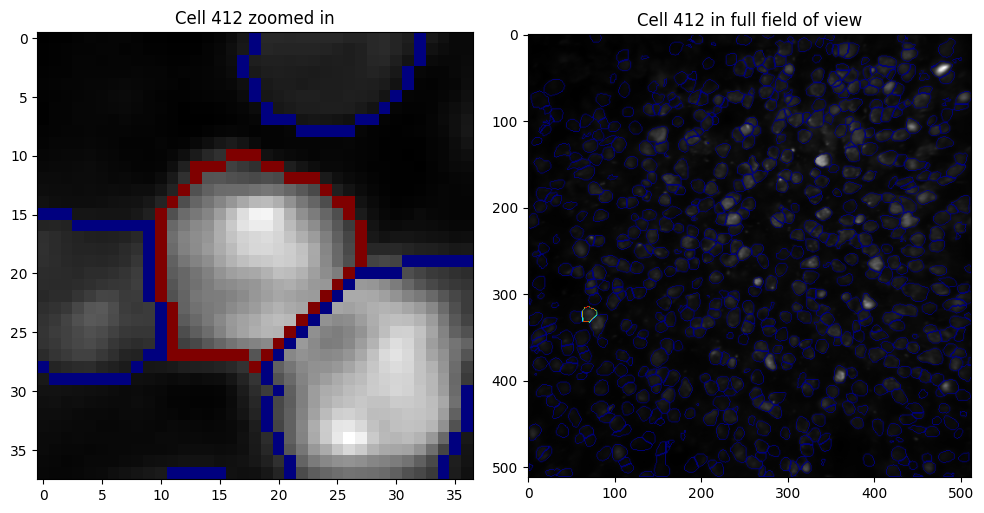

Processing session 12 for cool cell 339
Session ID: -t12


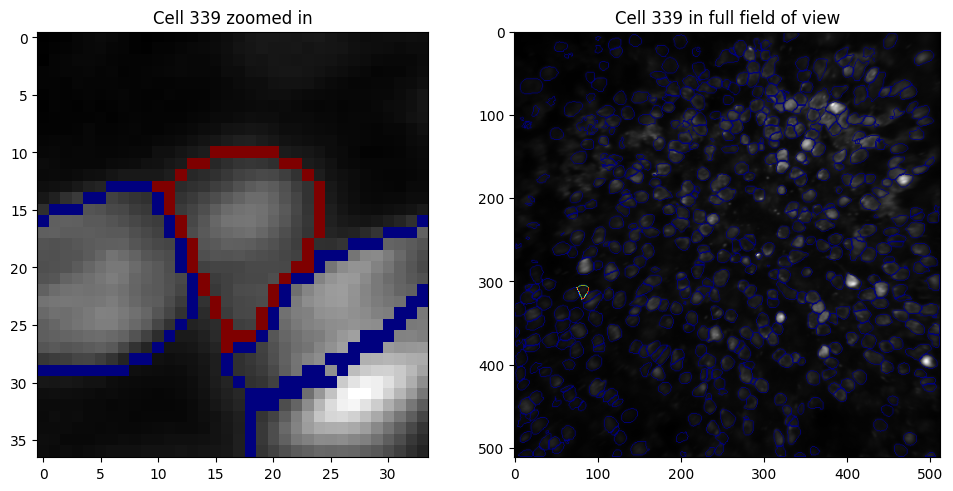

Processing session 14 for cool cell 333
Session ID: -t14


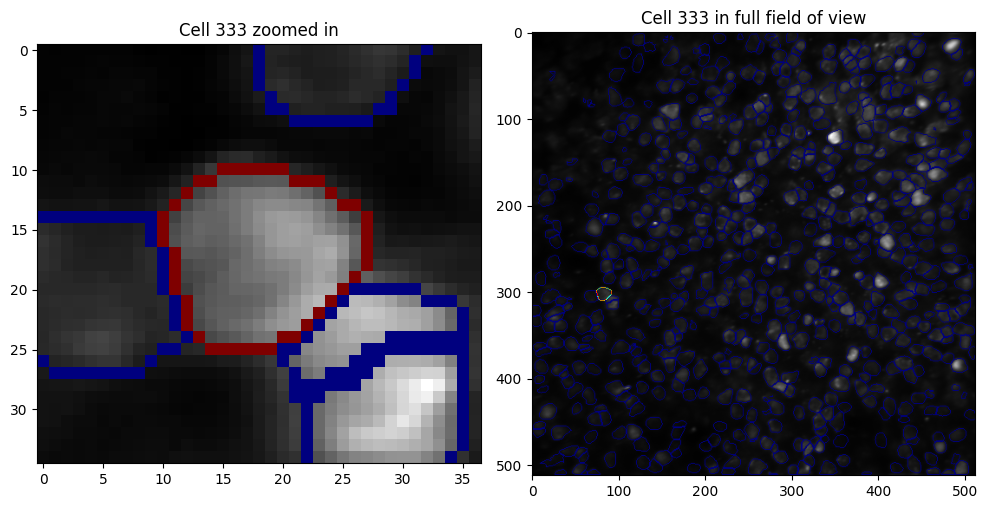

In [185]:
#for all sessions, plot the cool cell
base_path = '/Volumes/mrsic_flogel/public/projects/AtApSuKuSaRe_20250129_HFScohort2/'
mouse = 'TAA0000066'
sessions = [8,9,12,14]
# cell_ids[6,0] = 353 #set this for test cell because it is misidentified in session 6
for stage in sessions:
    cool_cell_id = cell_ids[stage, 0]
    if np.isnan(cool_cell_id):
        print(f'Skipping session {stage} as cool cell ID is NaN')
        continue
    cool_cell_id = int(cool_cell_id)
    print(f'Processing session {stage} for cool cell {cool_cell_id}')
    session_id = f'-t{stage:d}'
    print(f'Session ID: {session_id}')
    imaging_path, config_path, frame_ix, date1, date2 = cellTV.get_session_folders(base_path, mouse, session_id)
    ops = np.load(os.path.join(imaging_path, 'ops.npy'), allow_pickle=True).item()
    seg = np.load(os.path.join(imaging_path, 'meanImg_seg.npy'), allow_pickle=True).item()
    cellTV.show_cell_fov(cool_cell_id, ops, seg)


In [12]:
#save dF per session in dict
dF_dict = {}
session_dict = {}
for stage in sessions:
    session_id = f'-t{stage:d}'
    imaging_path, config_path, frame_ix, date1, date2 = cellTV.get_session_folders(base_path, mouse, session_id)
    if session_id in ['-t3','-t4','-t5', '-t6']:
        session = parse_session_functions.analyse_npz_pre7(mouse, date2, plot=False)
    else:
        session = parse_session_functions.analyse_npz(mouse,date2,plot=False)
    session_dict[stage] = session
    cool_cell_id = cell_ids[stage, 0]
    if np.isnan(cool_cell_id):
        print(f'Skipping session {stage} as cool cell ID is NaN')
        continue
    cool_cell_id = int(cool_cell_id)
    f, fneu, iscell, ops, seg, frame_rate = cellTV.load_img_data(imaging_path)
    if session_id == '-t7':
        f = f[:, ::2]
        fneu = fneu[:, ::2]
    dF = cellTV.get_dff(f, fneu, frame_ix, ops)
    dF_dict[stage] = dF
    # cellTV.extract_reward_tuning(dF, cool_cell_id, session, frame_rate=45 ,window_size = [-1,5], plot=True)


Training and Imaging
Defining goal 1 =  1
Defining goal 2 =  3
Performance =  0.02138536866359447
Number of laps =  73
Calculated dF/F with the following parameters: baseline=maximin, win_baseline=60.0, sig_baseline=10.0, fs=45,perctile_baseline=8.0
Training and Imaging
Defining goal 1 =  1
Defining goal 2 =  3
Performance =  0.5798968253968255
Number of laps =  86
Calculated dF/F with the following parameters: baseline=maximin, win_baseline=60.0, sig_baseline=10.0, fs=45,perctile_baseline=8.0
Training and Imaging
Performance =  0.43508230452674895
Number of laps =  92
Calculated dF/F with the following parameters: baseline=maximin, win_baseline=60.0, sig_baseline=10.0, fs=45,perctile_baseline=8.0
Training and Imaging
Performance =  0.7336947278911565
Number of laps =  109
Calculated dF/F with the following parameters: baseline=maximin, win_baseline=60.0, sig_baseline=10.0, fs=45,perctile_baseline=8.0
Training and Imaging
Defining goal 1 =  1
Defining goal 2 =  3
Performance =  0.80052

Skipping session 8 as cool cell ID is NaN
Number of rewards: 144
Number of outliers: 0
Number of rewards after removing outliers: 144
Number of rewards: 157
Number of outliers: 0
Number of rewards after removing outliers: 157


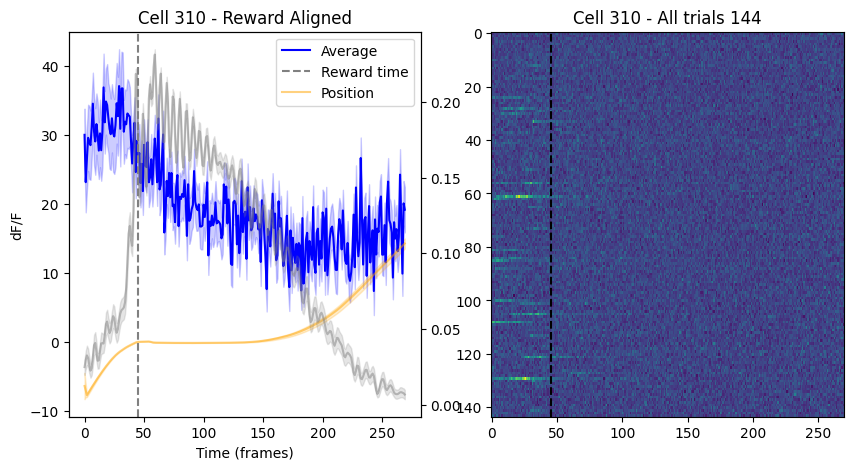

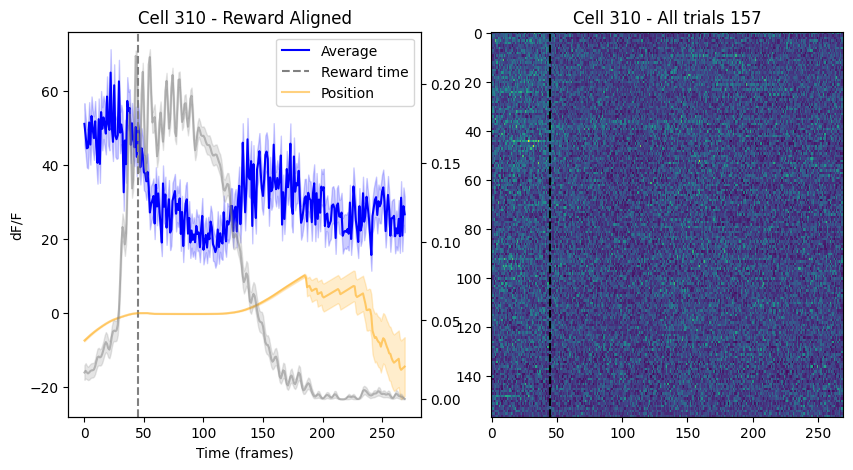

In [161]:
for stage in sessions:
    cool_cell_id = cell_ids[stage, 0]
    if np.isnan(cool_cell_id):
        print(f'Skipping session {stage} as cool cell ID is NaN')
        continue
    cool_cell_id = int(cool_cell_id)
    cellTV.extract_reward_tuning(dF_dict[stage], cool_cell_id, session_dict[stage], frame_rate=45 ,window_size = [-1,5], plot=True)

Skipping session 8 as cool cell ID is NaN


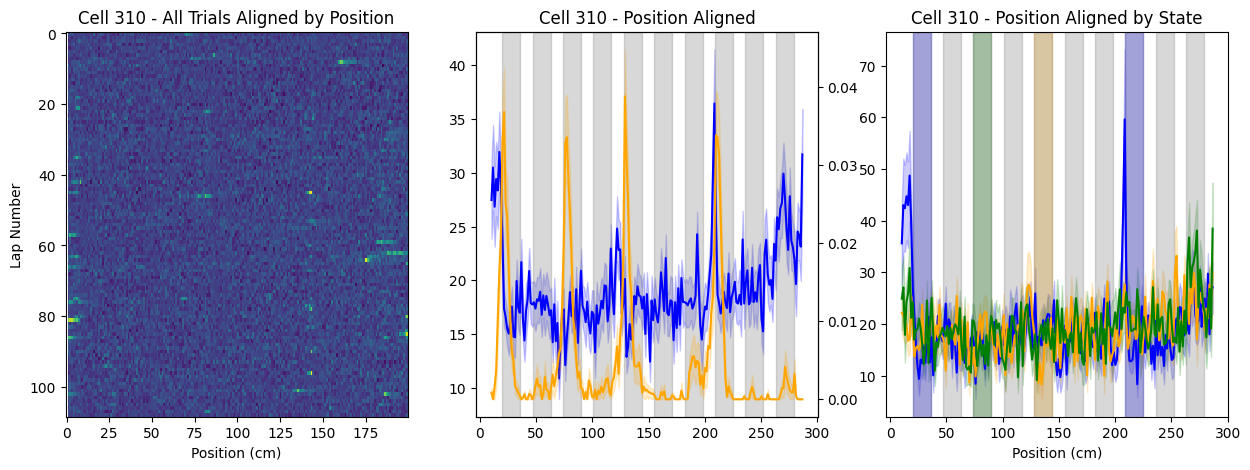

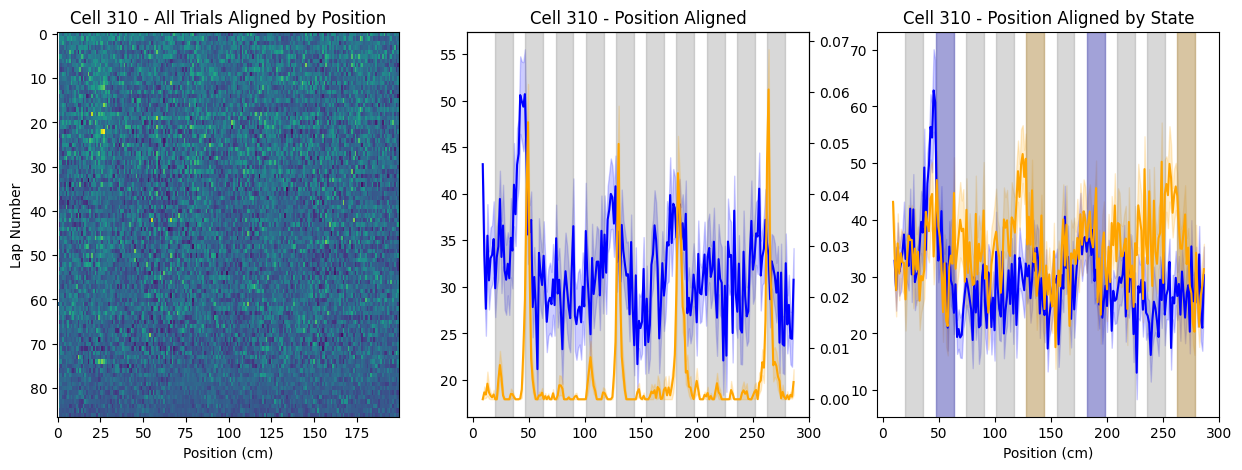

In [162]:
for stage in sessions:
    session_id = f'-t{stage:d}'
    cool_cell_id = cell_ids[stage, 0]
    if np.isnan(cool_cell_id):
        print(f'Skipping session {stage} as cool cell ID is NaN')
        continue
    cool_cell_id = int(cool_cell_id)
    cellTV.extract_position_tuning(dF_dict[stage], cool_cell_id, session_id, session_dict[stage], frame_rate=45, bins=200, plot=True)

Skipping session 8 as cool cell ID is NaN


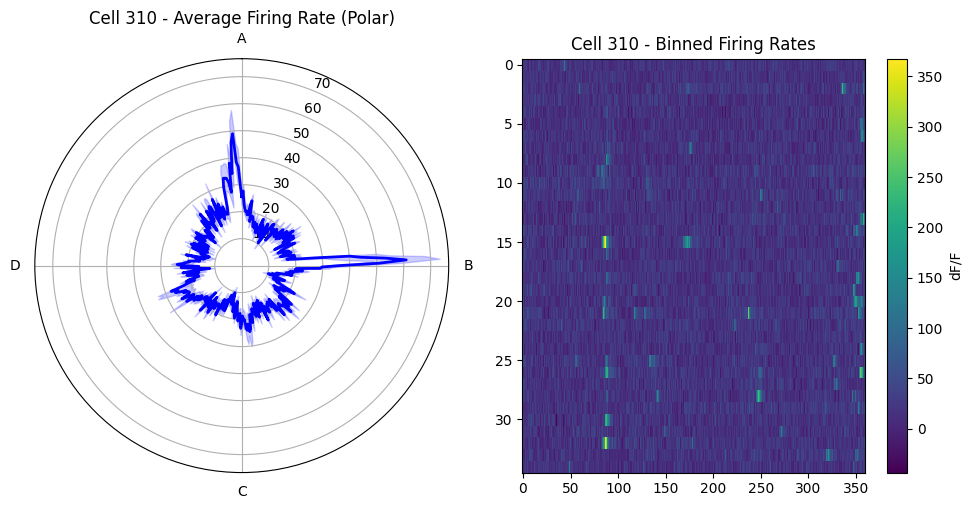

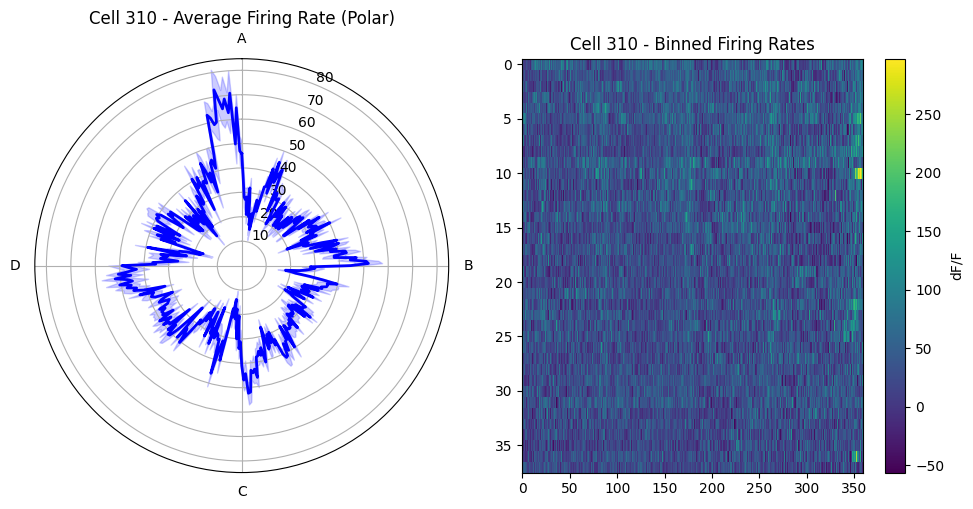

In [163]:
for stage in sessions:
    session_id = f'-t{stage:d}'
    cool_cell_id = cell_ids[stage, 0]
    if np.isnan(cool_cell_id):
        print(f'Skipping session {stage} as cool cell ID is NaN')
        continue
    cool_cell_id = int(cool_cell_id)
    cellTV.extract_goal_progress(dF_dict[stage], cool_cell_id, session_dict[stage], frame_rate=45, bins=90, plot=True, shuffle=False)

Real score for cell 0 is 0.87, phase preference is 45.00, state preference is 1.00, state tuning is 0.08
Real score for cell 1 is 0.84, phase preference is 44.00, state preference is 3.00, state tuning is 0.24
Real score for cell 2 is 0.65, phase preference is 14.00, state preference is 0.00, state tuning is 0.10
Real score for cell 3 is 0.74, phase preference is 0.00, state preference is 1.00, state tuning is 0.12
Real score for cell 4 is 0.76, phase preference is 14.00, state preference is 1.00, state tuning is 0.28
Real score for cell 5 is 0.96, phase preference is 22.00, state preference is 1.00, state tuning is 0.42
Real score for cell 6 is 0.81, phase preference is 4.00, state preference is 0.00, state tuning is 0.18
Real score for cell 7 is 1.48, phase preference is 84.00, state preference is 2.00, state tuning is 0.60
Real score for cell 8 is 0.98, phase preference is 0.00, state preference is 2.00, state tuning is 0.21
Real score for cell 9 is 0.94, phase preference is 87.00, 

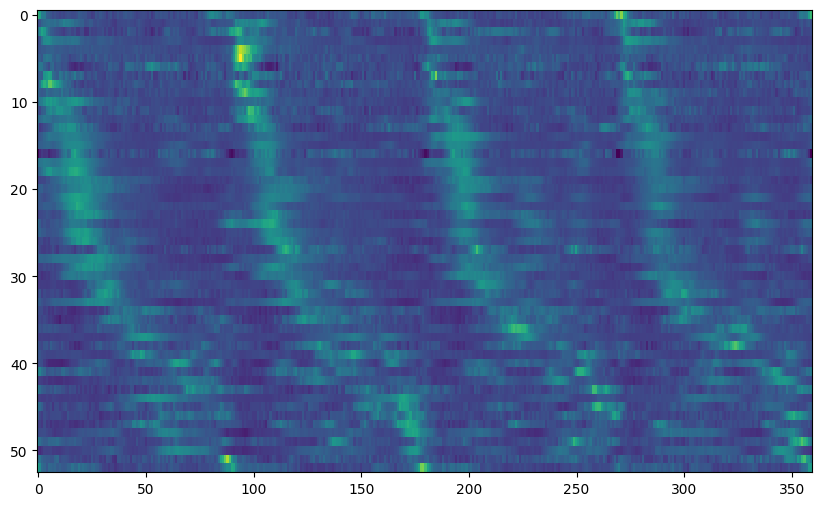

In [165]:
dF = dF_dict[12]
av_binned_all = np.zeros((dF.shape[0], 90*4))  # Initialize an array to store average binned data for each cell
score = np.zeros(dF.shape[0])
phase_pref = np.zeros(dF.shape[0])
state_pref = np.zeros(dF.shape[0])
state_tuning = np.zeros(dF.shape[0])
for c in range(dF.shape[0]):
    av_binned_all[c,:],score[c],_,phase_pref[c],state_pref[c],state_tuning[c] = cellTV.calc_goal_tuningix(dF, c, session_dict[12], condition='goal', event_frames=None, n_goals=4, frame_rate=45, bins=90, shuffle=False, plot=False)

zscore_av_binned_all = stats.zscore(av_binned_all, axis=1)

#select only cells with a score >1.5
high_score_cells = np.where(score > 1.5)[0]
zscore_av_binned_all_select = zscore_av_binned_all[high_score_cells]
phase_pref_select = phase_pref[high_score_cells]

#sort cells by the preferred phase
sorted_indices = np.argsort(phase_pref_select)

plt.figure(figsize=(10, 6))
plt.imshow(zscore_av_binned_all_select[sorted_indices], aspect='auto', cmap='viridis', interpolation='none')

Real score for cell 0 is 0.86, phase preference is 11.00, state preference is 1.00, state tuning is 0.14
Real score for cell 1 is 0.79, phase preference is 13.00, state preference is 1.00, state tuning is 0.18
Real score for cell 2 is 0.87, phase preference is 86.00, state preference is 2.00, state tuning is 0.10
Real score for cell 3 is 1.50, phase preference is 17.00, state preference is 0.00, state tuning is 0.22
Real score for cell 4 is 0.88, phase preference is 2.00, state preference is 1.00, state tuning is 0.28
Real score for cell 5 is 1.45, phase preference is 56.00, state preference is 2.00, state tuning is 1.22
Real score for cell 6 is 1.06, phase preference is 83.00, state preference is 1.00, state tuning is 0.64
Real score for cell 7 is 1.05, phase preference is 86.00, state preference is 0.00, state tuning is 0.26
Real score for cell 8 is 0.94, phase preference is 69.00, state preference is 1.00, state tuning is 0.32
Real score for cell 9 is 1.35, phase preference is 2.00,

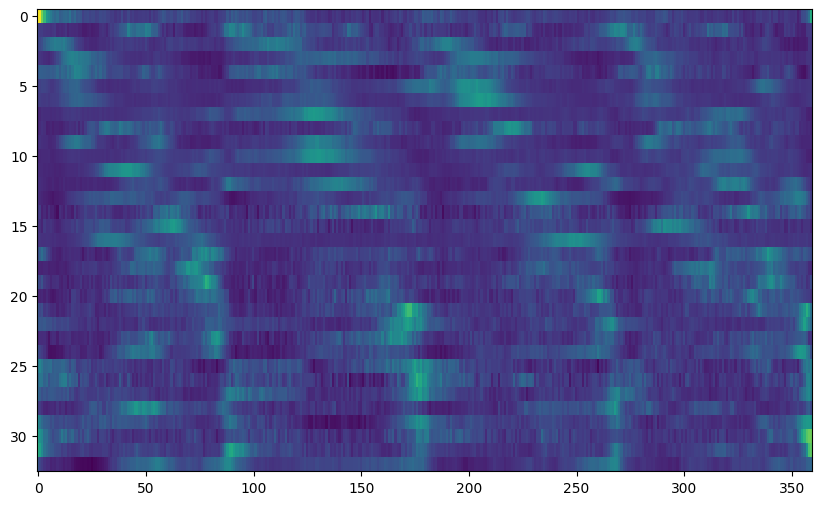

In [177]:
compare_session = 8

dF = dF_dict[compare_session]
av_binned_all_2 = np.zeros((dF.shape[0], 90*4))  # Initialize an array to store average binned data for each cell
score_2 = np.zeros(dF.shape[0])
phase_pref_2 = np.zeros(dF.shape[0])
state_pref_2 = np.zeros(dF.shape[0])
state_tuning_2 = np.zeros(dF.shape[0])
for c in range(dF.shape[0]):
    av_binned_all_2[c,:],score_2[c],_,phase_pref_2[c],state_pref_2[c],state_tuning_2[c] = cellTV.calc_goal_tuningix(dF, c, session_dict[compare_session], condition='goal', event_frames=None, n_goals=4, frame_rate=45, bins=90, shuffle=False, plot=False)

zscore_av_binned_all_2 = stats.zscore(av_binned_all_2, axis=1)

#for plotting select only cells with a score >1.5
high_score_cells_2 = np.where(score_2 > 1.5)[0]
zscore_av_binned_all_2_select = zscore_av_binned_all_2[high_score_cells_2]
phase_pref_2_select = phase_pref_2[high_score_cells_2]

#sort cells by the preferred phase
sorted_indices_2 = np.argsort(phase_pref_2_select)

plt.figure(figsize=(10, 6))
plt.imshow(zscore_av_binned_all_2_select[sorted_indices_2], aspect='auto', cmap='viridis', interpolation='none')

High tuning cells in session 1: [512 152  19  12 501 392  27  46 307 122 523 101 475 338 469 481 388 400
 448 216 273 302 339 321 233 516 507 184 209 308 306 180 404 324 446 175
 463 215 154 249 137 385  84 319  33 377 389 198 200 379 178 310 185]
Their indices in session 2: [542 163   0  14   0 429  32   0   0   0   0 111 506   0   0 518   0 437
 491 247   0   0 377   0 274 552 538 207 237 350 352 201 442   0 488   0
   0 256 161   0 149   0   0   0  41 415   0 222 227 413   0   0   0]


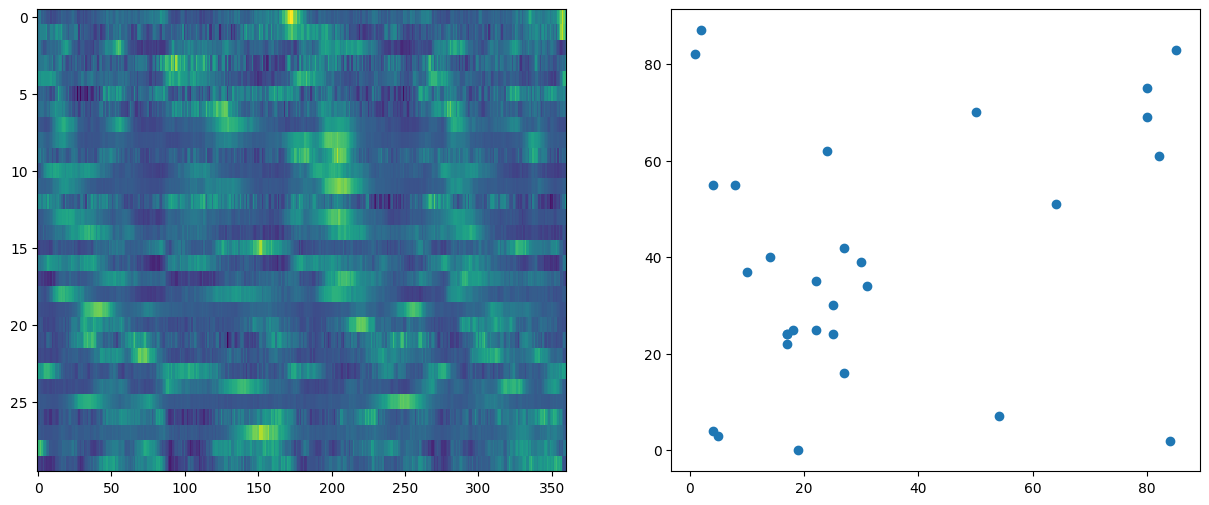

In [190]:
session_data = data[12, :]
first_indices = np.zeros(sorted_indices.shape[0])
cells = high_score_cells[sorted_indices]
for i, c in enumerate(cells):
    if c in session_data:
        idx = np.where(session_data == c)[0][0]
        first_indices[i] = idx
next_indices = data[compare_session, first_indices.astype(int)]
print(f'High tuning cells in session 1: {cells}')
print(f'Their indices in session 2: {next_indices.astype(int)}')

second_plot = zscore_av_binned_all_2[next_indices.astype(int), :]
second_plot[np.isnan(next_indices)] = np.nan
second_phase_pref = phase_pref_2[next_indices.astype(int)]
second_phase_pref[np.isnan(next_indices)] = np.nan
removed_invalid = second_plot[~np.isnan(second_phase_pref)]

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
# plt.imshow(np.ma.masked_invalid(second_plot), aspect='auto', cmap='viridis', interpolation='none')
plt.imshow(removed_invalid, aspect='auto', cmap='viridis', interpolation='none')
plt.subplot(1, 2, 2)
plt.scatter(phase_pref[cells], second_phase_pref)

In [183]:
#correlate the two phase preference vectors
corrected_phase_pref = phase_pref[cells]
corrected_phase_pref = np.delete(corrected_phase_pref, np.where(np.isnan(next_indices)))
corrected_second_pref = np.delete(second_phase_pref, np.where(np.isnan(next_indices)))

correlation = np.corrcoef(corrected_phase_pref, corrected_second_pref)
print(f'Correlation between sessions: {correlation[0, 1]}')

Correlation between sessions: 0.2438306596034156


In [ ]:
from pingouin import circ_corrcc
from pingouin import convert_angles
rad_phase1 = convert_angles(corrected_phase_pref)
rad_phase2 = convert_angles(corrected_second_pref)
r, pval = circ_corrcc(rad_phase1, rad_phase2)
print(f"Circular correlation coefficient: {r:.4f}, p-value: {pval:.4f}")

Circular correlation coefficient: 0.2462, p-value: 0.2880
